In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'svg'
import sys
import pickle
import numpy as np
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
from src.visualization.analyze_trajectories import EntropyDistributions
from src.visualization.visualize_fitness import Injection

In [3]:
i = Injection(sigma=1.3, num_odes=16)
i2 = Injection(sigma=0.8, num_odes=16)
i3 = Injection(sigma=0.5, num_odes=16)

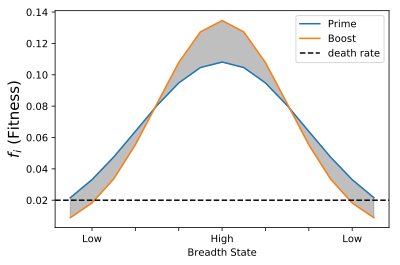

In [33]:
x_array = range(1, 16)
# f0 = np.zeros_like(x_array) + 1.0/15.0
f1 = np.loadtxt("../../data/raw/sequential_cocktail/Sequential/Sigma_1.3/fitness")
f2 = np.loadtxt("../../data/raw/sequential_cocktail/Sequential/Sigma_1.3/injection_2_sig_1.0/fitness")
# f3 = np.loadtxt("../../data/raw/sequential_cocktail/Sequential/Sigma_1.3/injection_2_sig_1.0/injection_3_sig_0.8/fitness")

fig, ax = plt.subplots()

ax.plot(x_array, f1, label="Prime")
ax.plot(x_array, f2, label="Boost")
# plt.plot(x_array, f2, label="Boost 1")
ax.fill_between(x_array, f1, f2, color='grey', alpha=0.5)
ax.axhline(0.02, color='black', linestyle='--', label="death rate")

labels = [item.get_text() for item in ax.get_xticklabels()]

empty_string_labels = ['']*len(labels)
empty_string_labels[4] = "High"
empty_string_labels[1] = empty_string_labels[-2] = "Low"
ax.set_xticklabels(empty_string_labels)

plt.ylabel("$f_{i}$ (Fitness)", size=15)
plt.xlabel("Breadth State", size=10)
plt.legend()


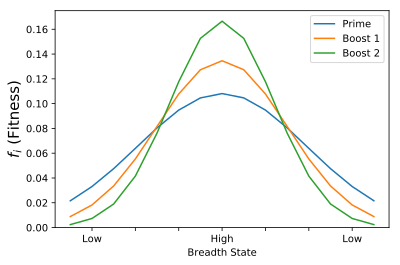

In [27]:
f1 = np.loadtxt("../../data/raw/sequential_cocktail/Sequential/Sigma_1.3/fitness")
f2 = np.loadtxt("../../data/raw/sequential_cocktail/Sequential/Sigma_1.3/injection_2_sig_1.0/fitness")
f3 = np.loadtxt("../../data/raw/sequential_cocktail/Sequential/Sigma_1.3/injection_2_sig_1.0/injection_3_sig_0.8/fitness")

fig, ax = plt.subplots()
x_array = range(1, 16)
ax.plot(x_array, f1, label="Prime")
ax.plot(x_array, f2, label="Boost 1")
ax.plot(x_array, f3, label="Boost 2")
# plt.axhline(0.02, color='black', linestyle='--', label="death rate")

labels = [item.get_text() for item in ax.get_xticklabels()]

empty_string_labels = ['']*len(labels)
empty_string_labels[4] = "High"
empty_string_labels[1] = empty_string_labels[-2] = "Low"
ax.set_xticklabels(empty_string_labels)

plt.xlabel("Breadth State")
plt.ylabel("$f_{i}$ (Fitness)", size=15)
plt.ylim(0, 0.175)
plt.legend()

(0, 0.6)

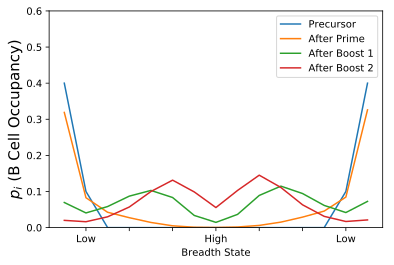

In [29]:
p0 = np.loadtxt("../../data/raw/sequential_cocktail/Sequential/Sigma_1.3/event_prob")
p1 = np.loadtxt("../../data/raw/sequential_cocktail/Sequential/Sigma_1.3/injection_2_sig_1.0/event_prob")
p2 = np.loadtxt("../../data/raw/sequential_cocktail/Sequential/Sigma_1.3/injection_2_sig_1.0/injection_3_sig_0.8/event_prob")
n_ave_3 = np.loadtxt("../../data/raw/sequential_cocktail/Sequential/Sigma_1.3/injection_2_sig_1.0/injection_3_sig_0.8/n_ave")
p3 = n_ave_3/np.sum(n_ave_3)

fig, ax = plt.subplots()
x_array = range(1, 16)
ax.plot(x_array, p0, label="Precursor")
ax.plot(x_array, p1, label="After Prime")
ax.plot(x_array, p2, label="After Boost 1")
ax.plot(x_array, p3, label="After Boost 2")
# plt.axhline(0.02, color='black', linestyle='--', label="death rate")

labels = [item.get_text() for item in ax.get_xticklabels()]

empty_string_labels = ['']*len(labels)
empty_string_labels[4] = "High"
empty_string_labels[1] = empty_string_labels[-2] = "Low"
ax.set_xticklabels(empty_string_labels)

plt.xlabel("Breadth State")
plt.ylabel("$p_{i}$ (B Cell Occupancy)", size=15)
plt.ylim(0, 0.175)
plt.legend()
plt.ylim(0, 0.6)

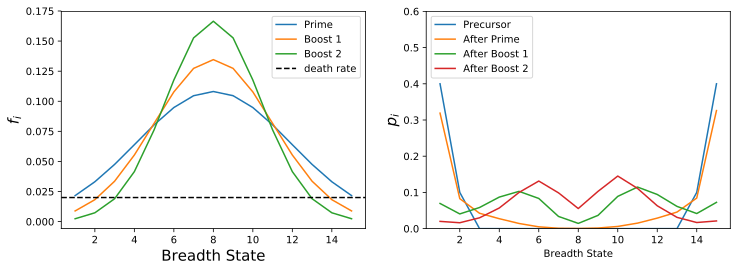

In [14]:
# Sequential versus Cocktail
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
f1 = np.loadtxt("../../data/raw/sequential_cocktail/Sequential/Sigma_1.3/fitness")
f2 = np.loadtxt("../../data/raw/sequential_cocktail/Sequential/Sigma_1.3/injection_2_sig_1.0/fitness")
f3 = np.loadtxt("../../data/raw/sequential_cocktail/Sequential/Sigma_1.3/injection_2_sig_1.0/injection_3_sig_0.8/fitness")

x_array = range(1, 16)
plt.plot(x_array, f1, label="Prime")
plt.plot(x_array, f2, label="Boost 1")
plt.plot(x_array, f3, label="Boost 2")
plt.axhline(0.02, color='black', linestyle='--', label="death rate")

plt.ylabel("$f_{i}$", size=15)
plt.xlabel("Breadth State", size=15)
plt.legend()

plt.subplot(1,2,2)
p0 = np.loadtxt("../../data/raw/sequential_cocktail/Sequential/Sigma_1.3/event_prob")
p1 = np.loadtxt("../../data/raw/sequential_cocktail/Sequential/Sigma_1.3/injection_2_sig_1.0/event_prob")
p2 = np.loadtxt("../../data/raw/sequential_cocktail/Sequential/Sigma_1.3/injection_2_sig_1.0/injection_3_sig_0.8/event_prob")

n_ave_3 = np.loadtxt("../../data/raw/sequential_cocktail/Sequential/Sigma_1.3/injection_2_sig_1.0/injection_3_sig_0.8/n_ave")
p4 = n_ave_3/np.sum(n_ave_3)

x_array = range(1, 16)
plt.plot(x_array, p0, label="Precursor")
plt.plot(x_array, p1, label="After Prime")
plt.plot(x_array, p2, label="After Boost 1")
plt.plot(x_array, p4, label="After Boost 2")

plt.ylabel("$p_{i}$", size=15)
plt.ylim(0, 0.6)
plt.xlabel("Breadth State")
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)


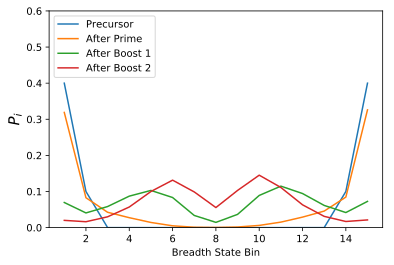

In [4]:
p0 = np.loadtxt("../../data/raw/sequential_cocktail/Sequential/Sigma_1.3/event_prob")
p1 = np.loadtxt("../../data/raw/sequential_cocktail/Sequential/Sigma_1.3/injection_2_sig_1.0/event_prob")
p2 = np.loadtxt("../../data/raw/sequential_cocktail/Sequential/Sigma_1.3/injection_2_sig_1.0/injection_3_sig_0.8/event_prob")

n_ave_3 = np.loadtxt("../../data/raw/sequential_cocktail/Sequential/Sigma_1.3/injection_2_sig_1.0/injection_3_sig_0.8/n_ave")
p4 = n_ave_3/np.sum(n_ave_3)

x_array = range(1, 16)
plt.plot(x_array, p0, label="Precursor")
plt.plot(x_array, p1, label="After Prime")
plt.plot(x_array, p2, label="After Boost 1")
plt.plot(x_array, p4, label="After Boost 2")

plt.ylabel("$P_{i}$", size=15)
plt.ylim(0, 0.6)
plt.xlabel("Breadth State Bin")
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)



In [17]:
sequential = np.loadtxt("../../data/raw/sequential_cocktail/Sequential/Sigma_1.3/injection_2_sig_1.0/injection_3_sig_0.8/n8")
sequential = np.append(sequential, np.zeros(1000 - len(sequential)))
cocktail = np.loadtxt("../../data/raw/sequential_cocktail/Cocktail/n8")

(0, 50)

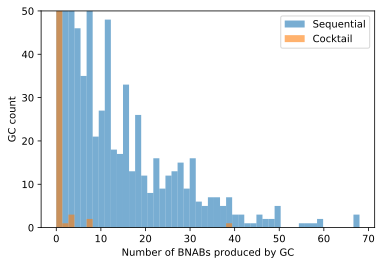

In [30]:
bins = plt.hist(sequential, label="Sequential", bins=50, alpha=0.6)
bins_cocktail = plt.hist(cocktail, label="Cocktail", bins=bins[1], alpha=0.6)

plt.legend()
plt.ylabel("GC count")
plt.xlabel("Number of BNABs produced by GC")
plt.ylim(0, 50)
